# Este projeto ainda está em andamento. 

## - Pedro Pescarole.

# Customer Segmentation

## Neste projeto, irei realizar uma clusterização não supervisionada de dados nos registros dos clientes de um banco de dados de uma empresa de alimentos. A segmentação de clientes é a prática de separar os clientes em grupos que refletem semelhanças entre os clientes em cada cluster. Irei dividir os clientes em segmentos para otimizar a importância de cada cliente para o negócio. Isso permite a modificação de produtos de acordo com as necessidades e comportamentos distintos dos clientes. Além disso, ajuda a empresa a atender às preocupações de diferentes tipos de clientes.

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
df_customers = pd.read_csv("C:/Users/User/Desktop/marketing_campaign.csv", delimiter='\t', encoding='UTF-8')

### Delimiter='/t' ?
Sim, usar este tipo de delimitador é mais comum do que parece. Este argumento especifica o delimitador que separa os valores no arquivo CSV. No código, o delimitador é definido como '\t', o que significa que o tab (tecla TAB) é usado como delimitador. Isso indica que os valores no arquivo CSV estão separados por TABs em vez do delimitador padrão, que é uma vírgula (,).

In [3]:
df_customers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df = df_customers.copy()

In [5]:
df.drop('ID', axis=1, inplace=True) 

In [6]:
print("Number of Rows: {}". format(df.shape[0]))
print("Number of Cols: {}". format(df.shape[1]))

Number of Rows: 2240
Number of Cols: 28


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

### Existem valores nulos na coluna 'income'

In [8]:
df = df.dropna()

### No próximo passo, vou criar uma feature (característica) com base em "Dt_Customer" que indica o número de dias que um cliente está registrado no banco de dados da empresa. No entanto, para manter as coisas simples, estou calculando esse valor em relação ao cliente mais recente no registro.

### Portanto, para obter os valores, devo verificar as datas mais recentes e mais antigas registradas.

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']) 
dates = []
for i in df['Dt_Customer']: 
    i = i.date()
    dates.append(i)
    
print('a data de inscrição do cliente mais recente nos registros:', max(dates))
    
print('a data de inscrição do cliente mais antigo nos registros', min(dates))

a data de inscrição do cliente mais recente nos registros: 2014-12-06
a data de inscrição do cliente mais antigo nos registros 2012-01-08


### Criando uma feature (característica) ("Customer_For") que representa o número de dias desde que os clientes começaram a fazer compras na loja em relação à data mais recente registrada.

In [10]:
days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
df['Customer_For'] = days
df['Customer_For'] = pd.to_numeric(df['Customer_For'], errors='coerce') 


### Agora, estarei explorando os valores únicos nas características categóricas para obter uma ideia clara dos dados.






In [11]:
print('Total categories in the featuer Marital_Status :\n', df['Marital_Status'].value_counts(), '\n') 

print('Total categories in the feature Education: \n', df['Education'].value_counts()) 

Total categories in the featuer Marital_Status :
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education: 
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


### esse código é usado para fornecer informações sobre as categorias únicas e suas contagens nas características "Marital_Status" e "Education" do conjunto de dados, o que pode ser útil para entender a distribuição de dados nessas colunas.

# Na próxima parte, vou realizar as seguintes etapas para criar novas características:

Extrair a "Idade" de um cliente com base no "Ano_Nascimento" indicando o ano de nascimento da pessoa em questão.

Criar uma outra característica "Gasto" indicando o valor total gasto pelo cliente em diversas categorias ao longo de dois anos.

Criar outra característica "Morando_Com" a partir de "Estado_Civil" para extrair a situação de convivência de casais.

Criar uma característica "Crianças" para indicar o número total de crianças em um domicílio, ou seja, crianças e adolescentes.

Para obter uma compreensão mais clara do tamanho do domicílio, criar uma característica indicando "Tamanho_Familiar".

Criar uma característica "É_Pai" para indicar o status de paternidade.

Por fim, criar três categorias na característica "Educação" simplificando suas contagens de valores.

Eliminar algumas das características redundantes.

In [12]:
df["Age"] = 2021-df["Year_Birth"]

df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

df["Children"]=df["Kidhome"]+df["Teenhome"]

df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"]
df = df.drop(to_drop, axis=1)

In [13]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


As estatísticas acima mostram algumas discrepâncias na média de renda (Income) e idade (Age) e na renda máxima e idade máxima.
significado de discrepância:
1. característica daquilo que discrepa; desigualdade, diferença, discordância.


Observe que a idade máxima é de 128 anos, pois calculei a idade com base no ano atual (ou seja, 2021), e os dados são antigos.

Devo dar uma olhada mais ampla nos dados. Vou plotar algumas das características selecionadas.

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

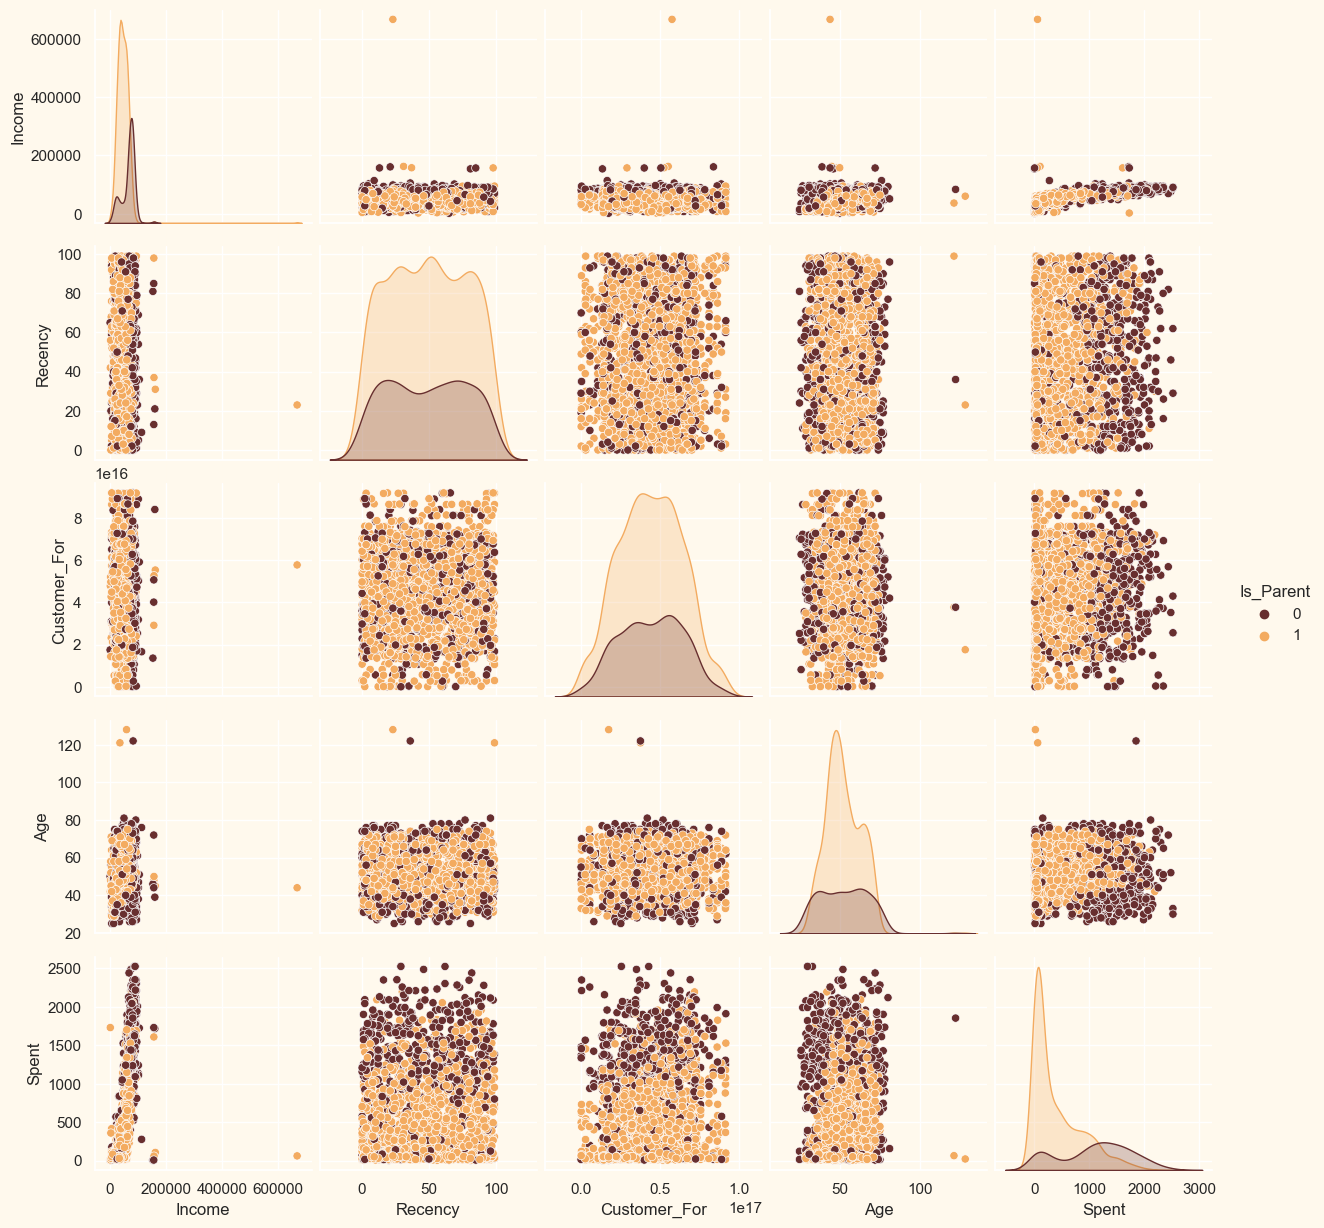

In [14]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
plt.show()

Claramente, há alguns valores atípicos nas características de Renda (Income) e Idade (Age). Vou excluir os valores atípicos nos dados.

= Um valor atípico, ou outlier, é um ponto de dados que é significativamente diferente dos demais na amostra ou conjunto de dados. Geralmente, um outlier é um valor que está muito distante dos demais em termos de magnitude ou que se desvia consideravelmente do padrão ou tendência observada nos dados.






In [15]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("A quantidade total de pontos de dados após a remoção dos outliers é:", len(df))

A quantidade total de pontos de dados após a remoção dos outliers é: 2212


### =
Aqui, o código filtra o DataFrame df para remover valores na coluna "Age" que sejam maiores ou iguais a 90. O objetivo é eliminar dados que representem idades consideradas improváveis ou extremas, possivelmente consideradas outliers no conjunto de dados. Portanto, qualquer linha onde a idade seja igual ou superior a 90 será removida do DataFrame df.

Na próxima linha, o código filtra o DataFrame df para remover valores na coluna "Income" que sejam maiores ou iguais a 600.000. Assim como na filtragem da idade, o objetivo é eliminar valores extremos ou improváveis de renda que possam ser considerados outliers.


### A seguir, vamos observar a correlação entre as características. (Excluindo os atributos categóricos neste ponto


<Axes: >

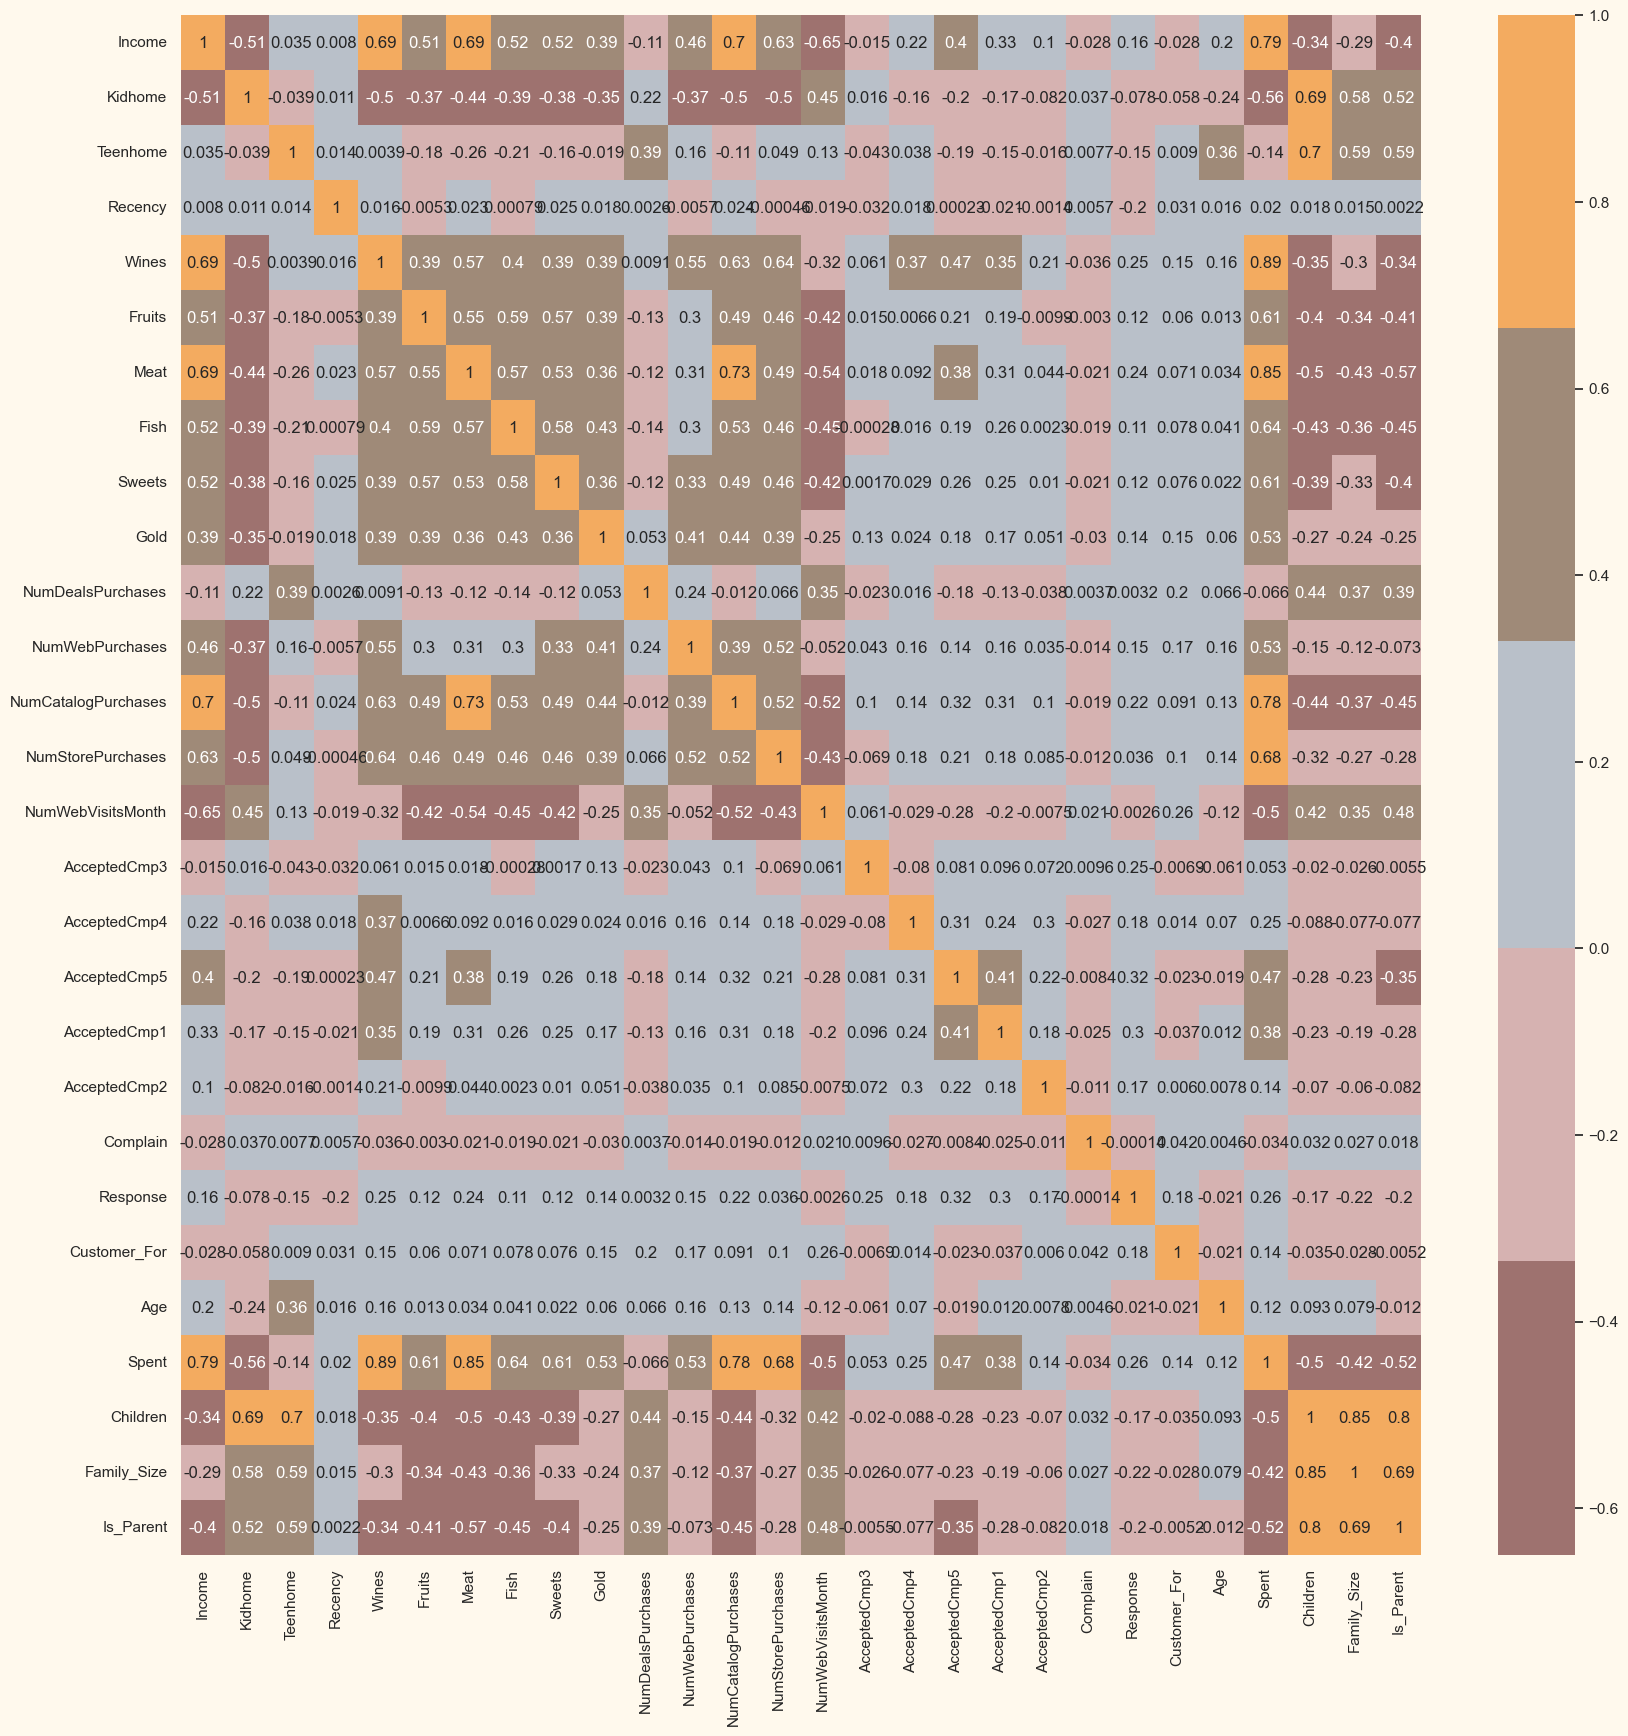

In [16]:
corrmat= df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)

In [17]:
df.isnull().sum()

Education              0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
Wines                  0
Fruits                 0
Meat                   0
Fish                   0
Sweets                 0
Gold                   0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Customer_For           0
Age                    0
Spent                  0
Living_With            0
Children               0
Family_Size            0
Is_Parent              0
dtype: int64

### Os dados estão bastante limpos e as novas características foram incluídas. Vou avançar para o próximo passo. Ou seja, o pré-processamento dos dados.







# DATA PREPROCESSING



Nesta seção, estarei pré-processando os dados para realizar operações de agrupamento.

Os seguintes passos serão aplicados para pré-processar os dados:

1. Label encoding das características categóricas

2. Escalonamento das características usando o escalador padrão

3. Criação de um subset do DataFrame para redução de dimensionalidade






In [27]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Variaveis categóricas no dataset:", object_cols)

Variaveis categóricas no dataset: []


### Label encoder 

In [26]:
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
print("Todas features agora são numéricas")

Todas features agora são numéricas


### = Para cada coluna categórica, aplica o método fit_transform do LabelEncoder para transformar as categorias em valores numéricos e substituir os valores originais no DataFrame data. O fit_transform ajusta os rótulos das categorias e os transforma em números inteiros.

### O Label Encoding é um método que atribui cada categoria a um número inteiro único. Ele é útil quando as categorias não têm qualquer ordem intrínseca. Por exemplo, se você tem uma coluna "gênero" com valores "masculino" e "feminino", o Label Encoding atribuiria 0 a "masculino" e 1 a "feminino".

In [25]:
ds = df.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("Todas features estão escaláveis agora")

Todas features estão escaláveis agora


A padronização de dados coloca-os em uma escala com média zero e desvio padrão unitário, os valores de cada variável são ajustados de forma (média zero, e desvio padrão igual a 1) 
Devido a fatores como a precisão numérica dos calculos ou a presença de valores extremos algumas operacoes de padronizacao podem nao resultar exatamente nesses valores. 

In [21]:
print("Dataframe a ser usado para modelagem:")
scaled_ds.head()

Dataframe a ser usado para modelagem:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


Em resumo, o pré-processamento realizado foi feito para preparar os dados para aplicação de técnicas de agrupamento (clustering), garantindo que todas as características sejam numéricas, na mesma escala e reduzindo a dimensionalidade para facilitar a análise e a interpretação dos resultados do clustering.

In [22]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,6.424437e-17,2.878377,-5.969394,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,-1.284887e-17,1.706839,-4.312196,-1.328316,-0.158123,1.242289,6.142721
col3,2212.0,3.212219e-17,1.221956,-3.530416,-0.829067,-0.022692,0.799895,6.611222


Dentro deste dataframe pca_ds contém os calculos feito pelo PCA, isto é o resultado da redução de dimensionalidade.

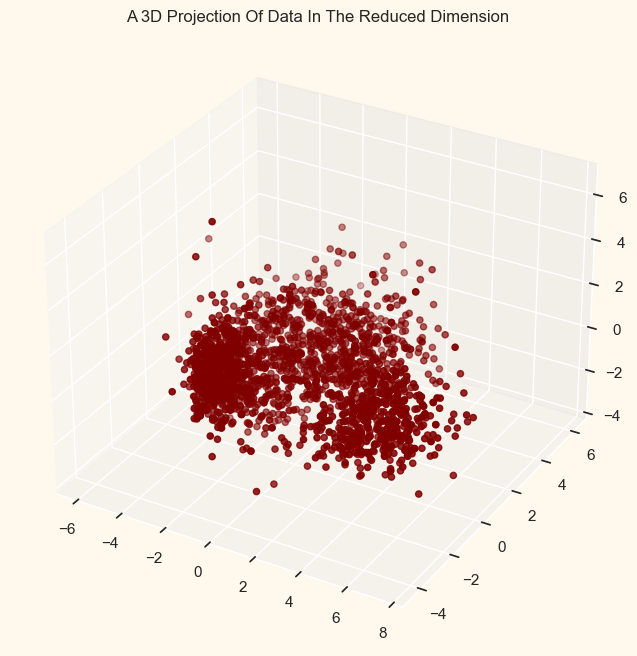

In [23]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [24]:
scaled_ds.head(30)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456
5,0.571657,0.490381,-0.822754,0.908097,-1.141097,0.636663,0.394373,-0.307889,-0.687527,0.363993,...,0.453643,1.290224,0.279818,-0.254385,0.163575,0.180505,0.740959,0.069987,0.449070,0.632456
6,-0.893586,0.170807,-0.822754,0.908097,-0.519047,-0.208416,0.973207,-0.013514,0.225554,0.534385,...,0.111982,0.367205,0.279818,1.035944,-0.178336,-0.028667,-1.349603,0.069987,-0.654644,0.632456
7,0.571657,-0.859793,1.040021,-0.929699,-0.588164,-0.679881,-0.410961,-0.495218,-0.632742,-0.634019,...,-0.913000,-0.555814,1.104543,-0.103847,-1.375024,-0.727564,0.740959,0.069987,0.449070,0.632456
8,0.571657,-1.003968,1.040021,-0.929699,-1.037422,-0.863722,-0.662628,-0.637946,-0.632742,-0.585335,...,-0.913000,-1.171160,1.516906,0.154219,-0.434769,-0.931755,0.740959,0.069987,0.449070,0.632456
9,0.571657,-2.151748,1.040021,0.908097,0.655937,-0.822210,-0.662628,-0.718230,-0.669265,-0.634019,...,-0.913000,-1.786506,6.052898,-1.050088,1.616696,-0.926775,0.740959,1.404572,1.552784,0.632456
